In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kde_funcs as kde

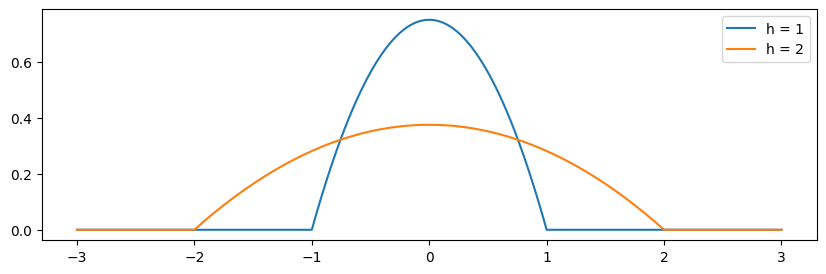

In [2]:
h = 2
x_arr = np.linspace(-3, 3, 1000)

plt.figure(figsize=(10, 3))
plt.plot(x_arr, kde.kernel_epa(x_arr), label='h = 1')
plt.plot(x_arr, (1/h) * kde.kernel_epa(x_arr / h), label=f'h = {h}')

plt.legend()
plt.show()

In [3]:
""" 
VL - Nichtparametrische Stat 

Def 4.2 Nadaraya-Watson-Schätzer

f_{n, h}^{NW} (x) = \frac {\sum Y_i K(x-x_i)}{\sum K(x-x_i)}} 

"""

' \nVL - Nichtparametrische Stat \n\nDef 4.2 Nadaraya-Watson-Schätzer\n\nf_{n, h}^{NW} (x) = \x0crac {\\sum Y_i K(x-x_i)}{\\sum K(x-x_i)}} \n\n'

In [84]:
def nadaraya_watson(x_obs, y_obs, x_pred, kernel, h=1):

    """
    Nadaraya-Watson kernel regression estimator
    """

    y_pred = np.zeros(x_pred.shape[0])

    if kernel == 'epa':
        kernel_func = kde.kernel_epa
    if kernel == 'gauss':
        kernel_func = kde.kernel_gauss
    if kernel == 'rect':
        kernel_func = kde.kernel_rect
    if kernel == 'tri':
        kernel_func = kde.kernel_tri
    if kernel == 'sinc':
        kernel_func = kde.kernel_sinc

    # for each evaluation point

        # w = evaluate kernel function of each observation at evaluation point
        # w * y = multiply with respective y_obs
        # y_pred = w * y / sum(w)

    for i, x in enumerate(x_pred):
        
        w = kernel_func((x - x_obs) / h)
        y_pred[i] = np.sum(w * y_obs) / np.sum(w)

        # if np.sum(w) == 0: print(f"sum of weights = 0 at x = {x}")

    return y_pred

sum of weights = 0 at x = 0.12080536912751678
sum of weights = 0 at x = 0.18120805369127518
sum of weights = 0 at x = 0.24161073825503357
sum of weights = 0 at x = 0.30201342281879195
sum of weights = 0 at x = 0.36241610738255037
sum of weights = 0 at x = 0.4228187919463087
sum of weights = 0 at x = 0.48322147651006714
sum of weights = 0 at x = 0.7852348993288591
sum of weights = 0 at x = 0.8456375838926175
sum of weights = 0 at x = 0.9060402684563759
sum of weights = 0 at x = 0.9664429530201343
sum of weights = 0 at x = 1.0268456375838926
sum of weights = 0 at x = 1.087248322147651
sum of weights = 0 at x = 1.1476510067114094
sum of weights = 0 at x = 1.389261744966443
sum of weights = 0 at x = 1.4496644295302015
sum of weights = 0 at x = 1.5100671140939599
sum of weights = 0 at x = 1.5704697986577183
sum of weights = 0 at x = 1.6308724832214765
sum of weights = 0 at x = 1.691275167785235
sum of weights = 0 at x = 1.7516778523489933
sum of weights = 0 at x = 1.8120805369127517
sum of 

C:\Users\ytl_c\AppData\Local\Temp\ipykernel_14104\1904836096.py:33: RuntimeWarning: invalid value encountered in scalar divide
  y_pred[i] = np.sum(w * y_obs) / np.sum(w)


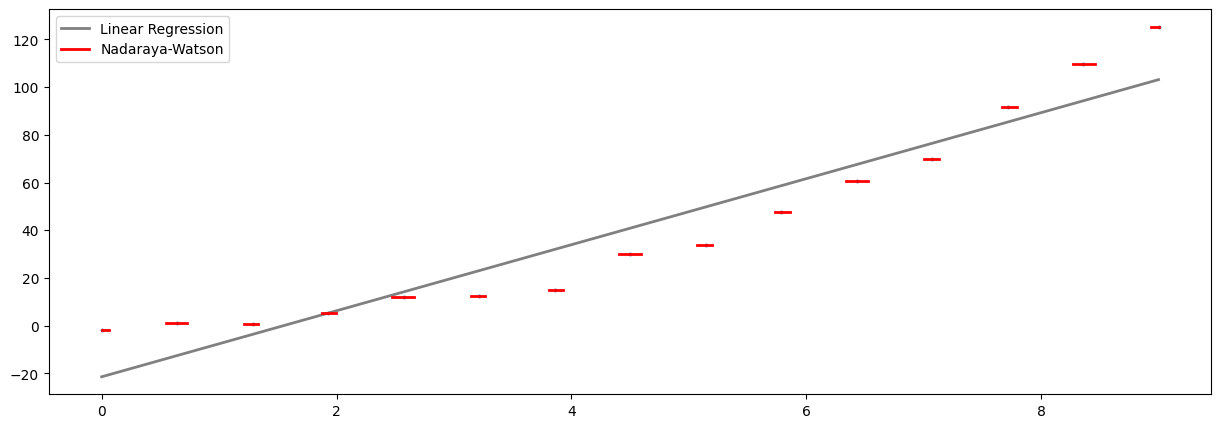

In [91]:
# generate data using trend = x^2 and gaussian noise

n = 15
x_min = 0
x_max = 9

x = np.linspace(x_min, x_max, n)
# print(f"observations at x = {x}")

y = x**2.2 + np.random.normal(0, 3, n)

from sklearn.linear_model import LinearRegression

# Fit Linear Regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Use Nadaraya-Watson Estimator
x_pred = np.linspace(x_min, x_max, n*10)
# print(f"making NW pred at {x_pred}")

y_pred_nw = nadaraya_watson(x, y, x_pred, 'tri', h=0.1)

# Plot the original data and the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=3)
plt.plot(x, y_pred, color='grey', lw=2, label='Linear Regression')
plt.plot(x_pred, y_pred_nw, color='red', lw=2, label='Nadaraya-Watson')

plt.legend()
plt.show()